In [21]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [36]:
soildata=pd.read_csv('data.csv')


In [37]:
soildata.rename(columns = {'moisture':'Humidité'}, inplace = True)
soildata.rename(columns = {'temp':'Température'}, inplace = True)
soildata.rename(columns = {'pump':'Arrosage'}, inplace = True)
print( 'Taille(n_lignes,n_colonnes)of data frame :',soildata.shape)
soildata.head(10)

Taille(n_lignes,n_colonnes)of data frame : (200, 4)


,crop,Humidité,Température,Arrosage
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
5,cotton,558,23,1
6,cotton,578,12,1
7,cotton,673,35,1
8,cotton,642,45,1
9,cotton,723,11,1


In [38]:
soildata.describe()

,Humidité,Température,Arrosage
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [39]:
soildata['Arrosage'].value_counts()

1    150
0     50
Name: Arrosage, dtype: int64

Text(0.5, 1.0, 'Distribution de l arrosage')

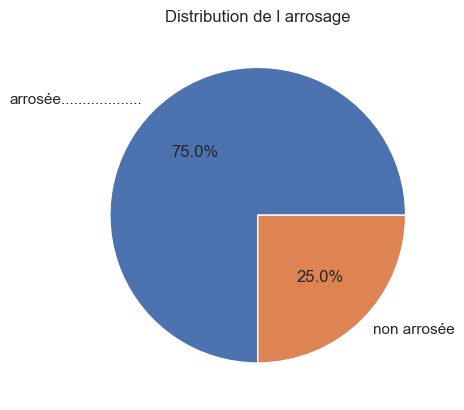

In [40]:
labels=["arrosée...................","non arrosée"]
y=np.array([150, 50])
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.title('Distribution de l arrosage')

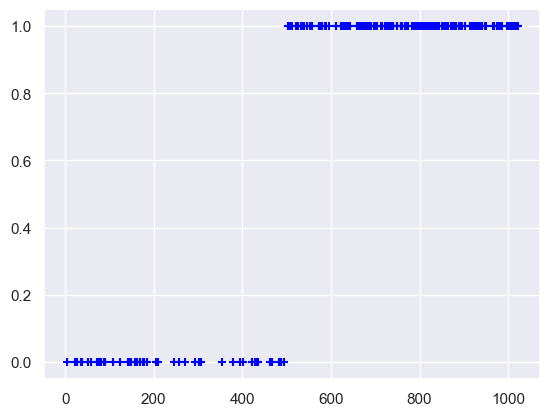

In [41]:
plt.scatter(soildata.Humidité,soildata.Arrosage,marker='+',color='blue')

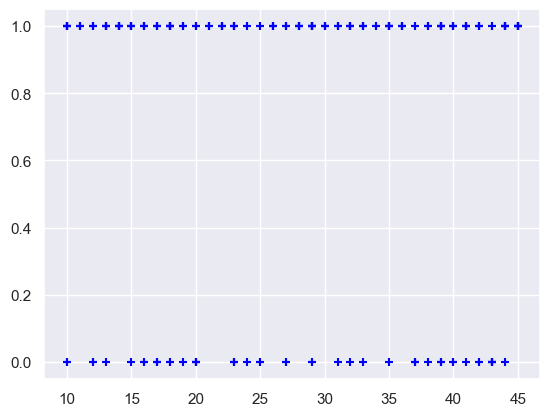

In [42]:
plt.scatter(soildata.Température,soildata.Arrosage,marker='+',color='blue')

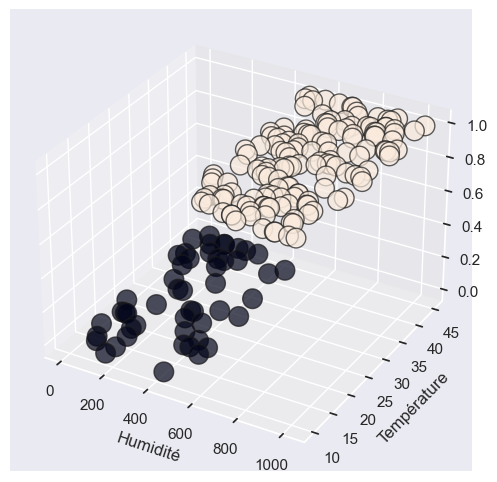

In [43]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(soildata.Humidité, soildata.Température, soildata.Arrosage,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=soildata.Arrosage)
plt.xlabel("Humidité")
plt.ylabel("Température")

plt.show()

C:\Users\vinnu\AppData\Local\Temp\ipykernel_9528\3054236154.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = soildata.corr()


<Axes: >

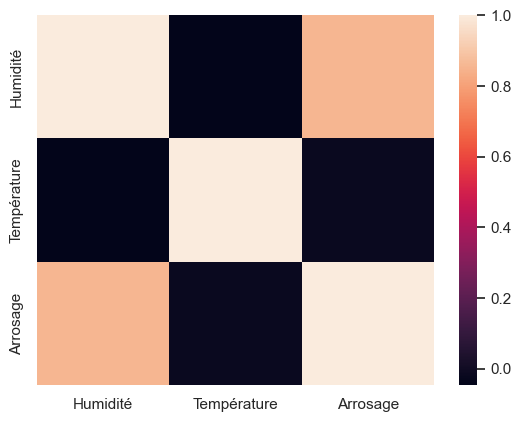

In [44]:
cormat = soildata.corr()
round(cormat,2)
sns.heatmap(cormat)

In [45]:
from sklearn.model_selection import train_test_split 

In [46]:
X = soildata.drop(['Arrosage','crop'], axis=1)
y = soildata['Arrosage']

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2,stratify=y, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

0.95 : is the accuracy score
0.9375 : is the precision score
1.0 : is the recall score
0.967741935483871 : is the f1 score


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[30  0]
 [ 2  8]]


Confusion matrix, without normalization
[[30  0]
 [ 2  8]]


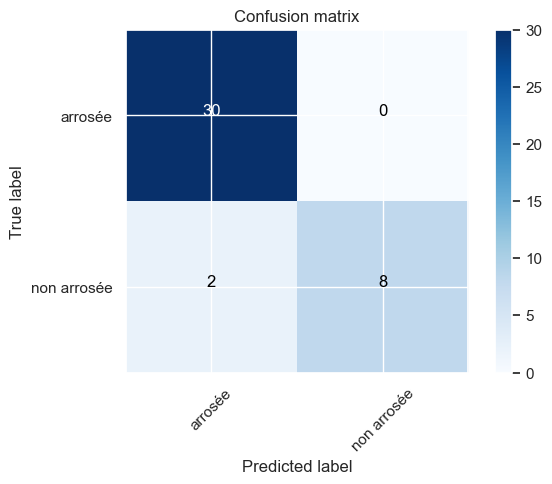

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['arrosée','non arrosée'],normalize= False,  title='Confusion matrix')

In [52]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        30

    accuracy                           0.95        40
   macro avg       0.97      0.90      0.93        40
weighted avg       0.95      0.95      0.95        40



In [53]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 1]
